In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [74]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [75]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [76]:
tc = pd.to_numeric(df.totalcharges,errors = 'coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [77]:
df[tc.isnull()][['customerid','totalcharges']]

df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')

In [78]:
df.totalcharges = df.totalcharges.fillna(0)

In [79]:
df.churn = (df.churn == 'yes').astype(int)

In [80]:
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1


Setting up the validation framework

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1)

In [83]:
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [84]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [85]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [86]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [87]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

EDA

In [88]:
df_full_train = df_full_train.reset_index(drop=True)

df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [89]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [90]:
numerical = ['tenure','monthlycharges','totalcharges']

categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [91]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Feature importance

Churn rate

In [92]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [93]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [94]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [95]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [96]:
churn_parter = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_parter

0.20503330866025166

In [97]:
churn_no_parter = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_parter

0.3298090040927694

In [98]:
global_churn - churn_parter

0.06493474245795922

Risk ratio

In [99]:
churn_no_parter / global_churn

1.2216593879412643

In [100]:
churn_parter/global_churn

0.7594724924338315

In [101]:
for c in categorical:
    print(c)

    df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn

    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




partner


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




dependents


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




phoneservice


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




multiplelines


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




internetservice


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




onlinesecurity


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




onlinebackup


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




deviceprotection


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




techsupport


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




streamingtv


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




streamingmovies


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




contract


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




paperlessbilling


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




paymentmethod


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


Feature importance

In [102]:
from sklearn.metrics import mutual_info_score

In [103]:
mutual_info_score(df_full_train.churn,df_full_train.contract)

0.0983203874041556

In [104]:
def mutual_info_churn(series):
    return mutual_info_score(series,df_full_train.churn)

In [105]:
mi = df_full_train[categorical].apply(mutual_info_churn)
mi.sort_values(ascending=True)

gender              0.000117
phoneservice        0.000229
multiplelines       0.000857
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
paperlessbilling    0.017589
streamingmovies     0.031581
streamingtv         0.031853
paymentmethod       0.043210
deviceprotection    0.043453
onlinebackup        0.046923
internetservice     0.055868
techsupport         0.061032
onlinesecurity      0.063085
contract            0.098320
dtype: float64

In [106]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [107]:
df_full_train[df_full_train.tenure<=2].churn.mean()

0.5953420669577875

In [108]:
df_full_train[(df_full_train.tenure>2) & (df_full_train.tenure <=12)].churn.mean()

0.3994413407821229

In [109]:
df_full_train[(df_full_train.tenure>12)].churn.mean()

0.17634908339788277

One-hot encoding

In [134]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

Logistic Regression

In [111]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [112]:
z = np.linspace(-5,5,51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

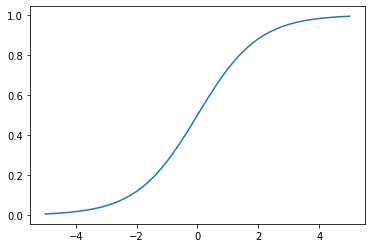

In [113]:
plt.plot(z,sigmoid(z));

In [114]:
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j] + w[j]
    return result
  

In [115]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j]*w[j]
    result = sigmoid(score)
    return result

Training logistic regression

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [118]:
model.intercept_[0]

-0.10908549428795015

In [119]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [120]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899161, 0.20434062, 0.2120355 , ..., 0.13635411, 0.79979564,
       0.83742907])

In [121]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [122]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [123]:
(y_val  == churn_decision).mean()

0.8034066713981547

In [126]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [129]:
df_pred['correct'] = (df_pred.prediction == df_pred.actual)

In [131]:
df_pred.correct.astype(int).mean()

0.8034066713981547

Model interpretation

In [141]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [142]:
small = ['contract','tenure','monthlycharges']

In [146]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [147]:
dicts_train_small = df_train[small].to_dict(orient = 'records')

dicts_val_small = df_val[small].to_dict(orient = 'records')

In [148]:
dv_small = DictVectorizer()

In [149]:
dv_small.fit(dicts_train_small)

DictVectorizer()

In [151]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [152]:
X_train_small = dv_small.transform(dicts_train_small)

In [153]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [154]:
w0 = model_small.intercept_[0]
w0

-2.4767756617779924

In [155]:
w =  model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [157]:
dict(zip(dv_small.get_feature_names(), w))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Using model

In [160]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient = 'records')
dicts_full_train

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [161]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [162]:
y_full_train = df_full_train.churn.values

In [163]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

LogisticRegression()

In [164]:
dicts_test = df_test[categorical+numerical].to_dict(orient ='records')
X_test = dv.transform(dicts_test)

In [166]:
y_pred = model.predict_proba(X_test)[:,1]

In [167]:
churn_decision = (y_pred >=0.5)

In [168]:
(churn_decision == y_test).mean()

0.815471965933286

In [175]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [176]:
X_small = dv.transform([customer])

In [179]:
model.predict_proba(X_small)[0,1]

0.40568109779166944

In [180]:
y_test[10]

0